一旦データのXY座標(初期地点0,0)で計算して、最後に緯度経度に変換する？

In [1]:
import numpy as np
import pandas as pd

import base64
import io

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')

In [2]:
import folium
from folium import plugins
from branca.colormap import LinearColormap, StepColormap, linear
import branca

# マップタイル選択
tile_name = ['OpenStreetMap', 'Mapbox Bright', 'Mapbox Control Room',
             'Stamen Terrain', 'Stamen Toner', 'Stamen Watercolor', 
             'Cartodb Positron', 'Cartodb dark_matter']

In [ ]:
fig, ax = plt.subplots(figsize=(5,2))
n, bins, patches = ax.hist(data, bins=20, alpha=0.8, label='label')
# 第2軸に累積の折れ線グラフを追加
data2 = n.cumsum() / n.sum()
ax2 = ax.twinx()
line = ax2.plot(bins[:-1], data2, ls='-', color='g')
ax2.set_yticks(np.arange(0, 1.2, 0.2))
ax2.grid(visible=False)
ax2.set_ylabel('cumulative relative freq.')

# ax.set_xticks(np.arange(0, 21, 1))
# plt.xlim(-0.1, 7)
ax.set_title('histogram')
ax.set_xlabel('value')
ax.set_ylabel('frequency')

buf = io.BytesIO()    # メモリ上への仮保管先を生成
fig.savefig(buf, format='png')    # メモリ上に保存
encoded_string = base64.b64encode(buf.getvalue()).decode('ascii')    # htmlに置ける文字列へ変換

In [ ]:
folium.CircleMarker(location=latlon, radius=3, tooltip='hist', fill=True,
                    popup=f"""<img src="data:image/png;base64,{encoded_string}" />""").add_to(m)

In [ ]:
color_scale = LinearColormap(['deepskyblue','lime','yellow','tomato'], vmin=int(df['data'].min()), vmax=int(df['data'].max()),
                             caption='dummy data')
color_scale

In [ ]:
m = folium.Map([36, 135], tiles=tile_name[6], zoom_start=8)
folium.Choropleth(geo_data=gdf.set_index('id'), name='choropleth', data=gdf[['id','data']], columns=['id','data'], key_on='feature.id',
                  fill_opacity=0.7, line_opacity=0.2, line_color='gray', fill_color='YlGnBu', highlight=True).add_to(m)
    
rect = np.array(gdf.loc[0, 'geometry'].bounds)[::-1].reshape((2,2))
folium.Rectangle(rect, color='blue', weight=3).add_to(m)
rect = np.array(gdf.loc[1, 'geometry'].bounds)[::-1].reshape((2,2))
folium.Rectangle(rect, color='red', weight=3).add_to(m)
sum_g = shapely.geometry.MultiPolygon([gdf.loc[0, 'geometry'], gdf.loc[1, 'geometry']])
rect = np.array(sum_g.bounds)[::-1].reshape((2,2))
folium.Rectangle(rect, color='black', weight=1).add_to(m)

m.fit_bounds(rect.tolist())
# m.save('/home/maeyamada/data/map.html')
m

In [ ]:
# DataFrameの緯度経度の最大最小にフィット
m.fit_bounds(df_spd[['lat','lon']].describe().loc[['min','max'],['lat','lon']].values.tolist())

In [ ]:
m = folium.Map(control_scale=True)
rect = folium.Rectangle(bounds=[[35.0, 138.0], [35.1, 138.1]],
                 color=None, fill_color='blue', fill_opacity=0.2).add_to(m)
m.fit_bounds(rect.get_bounds())
m

AntPath と レイヤー選択

In [ ]:
m = folium.Map(location=center, tiles='cartodbpositron', zoom_start=18, control_scale=True)
for idx, row in df.iterrows():
    fg = folium.FeatureGroup(name='%d' % row['linkid'])
    plugins.AntPath(locations=list(row['latlon']), weight=row['data']/5, color=color_scale(row['data']), opacity=0.8, 
                           reverse='True', dash_array=[20, 30]).add_to(fg)
    fg.add_to(m)

loc = df.loc[0, 'latlon'].tolist()[0]
pp = str(df.loc[0, 'linkid'])
folium.Marker(location=loc, popup=pp).add_to(m)
    
folium.LayerControl(collapsed=False).add_to(m)
m

In [ ]:
# ポリゴン作成用
m = folium.Map(location=[34.92358689624565, 137.21671917683034], tiles='OpenStreetMap', control_scale=True, zoom_start=17)
draw = plugins.Draw()
draw.add_to(m)
m

In [ ]:
lonlats = [[137.215051,34.92454],[137.219364,34.924241],[137.219964,34.923291],[137.21961,34.922904],[137.219482,34.922068],
           [137.218205,34.92118],[137.217583,34.921329],[137.216649,34.92191],[137.21607,34.921672],[137.215769,34.921936],
           [137.215651,34.922174],[137.215651,34.922534],[137.214932,34.923018],[137.214825,34.923326],[137.215051,34.92454]]
latlons = np.array(lonlats).T[::-1].T.tolist()

In [ ]:
# 結果確認用
m = folium.Map(location=[34.92358689624565, 137.21671917683034], tiles='OpenStreetMap', control_scale=True, zoom_start=17)
folium.Polygon(locations=latlons, weight=3, color='red', ).add_to(m)
m

In [ ]:
geoj = {"type":"Feature","properties":{},
        "geometry":{"type":"Polygon",
                    "coordinates":[[[137.215051,34.92454],[137.219364,34.924241],[137.219964,34.923291],[137.21961,34.922904],
                                    [137.219482,34.922068],[137.218205,34.92118],[137.217583,34.921329],[137.216649,34.92191],
                                    [137.21607,34.921672],[137.215769,34.921936],[137.215651,34.922174],[137.215651,34.922534],
                                    [137.214932,34.923018],[137.214825,34.923326],[137.215051,34.92454]]]
                   }
       }

In [ ]:
m = folium.Map(location=[34.92358689624565, 137.21671917683034], tiles='OpenStreetMap', control_scale=True, zoom_start=17)
folium.GeoJson(geoj).add_to(m)
m

文字付アイコン

In [ ]:
import folium
from folium import plugins
from folium.features import DivIcon

In [ ]:
# もっと調整が必要だけど、取り敢えず

def icon_style(icon_size=25, font_size=11, back_color='', string=''):
    """ CSSで文字入りアイコン """
    html = f"""<div style="
    text-align: center;
    font-size: {font_size}pt;
    color : black;
    width: {icon_size}px;
    height: {icon_size}px;
    background: {back_color};
    border: 2px solid #666;
    border-radius: 50%; ">{string}</div>
    """
    ret_icon = DivIcon(icon_size=(icon_size, icon_size), icon_anchor=(icon_size//2, icon_size//2), html=html)

    return ret_icon

# こんな感じ
m = folium.Map(location=target_points[tgt]['latlon'], control_scale=True, zoom_start=10)
for idx, row in df_top20.iterrows():
    tt = f"{row['count']} ({row['level2_name']}) {row['名称データ（区切り文字除去）']}"
    folium.Marker(location=[row['lat'], row['lon']], tooltip=tt, icon=icon_style(string=f'{idx+1}')).add_to(m)
m

In [ ]:
# 施設名(?)から緯度経度
from geopandas.tools import geocode

result = geocode("The Great Pyramid of Giza", provider="nominatim")
result

---
絶対XY座標を緯度経度へ変換 (回転させてスケール変更)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x0 = np.array([0, 0, 0.1, 0.1, 0.3, 0.6, 1.0, 1.5, 2.0, 2.5])
y0 = np.linspace(0, 9, num=10)
xy0 = np.array([np.array([x0, y0]).T[0], np.array([x0, y0]).T[-1]])
latlon = np.array([[35.68756297531757, 139.770068477072], [35.67723272005571, 139.76705634885334]])

In [3]:
xy0

array([[0. , 0. ],
       [2.5, 9. ]])

In [38]:
xy_dist = np.sqrt(x0[-1]**2 + y0[-1]**2)
# xy_rad = np.arctan(y0[-1] / x0[-1])
xy_rad = np.arcsin(y0[-1] / xy_dist)

buf = latlon[1] - latlon[0]
latlon_dist = np.sqrt(buf[0]**2 + buf[1]**2)
# latlon_rad = np.arctan(buf[0] / buf[1]) * (-1)
latlon_rad = np.arcsin(buf[0] / latlon_dist)
print(xy_rad * 180/np.pi, latlon_rad * 180/np.pi)

74.47588900324573 -73.74420615868169


In [24]:
a = np.array([1,2,3])
b = np.array([2,3,4])
np.sqrt(a**2 + b**2)

array([2.23606798, 3.60555128, 5.        ])

In [10]:
ratio = latlon_dist / xy_dist
rad = latlon_rad - xy_rad
# xy_dist_arr = np.sqrt(x0**2 + y0**2)
x1 = latlon[0][0] + x0 * np.cos(rad) * ratio
y1 = latlon[0][1] + y0 * np.sin(rad) * ratio

In [11]:
print(latlon[0][0], latlon[1][0])
print(x1[0], x1[-1])

35.68756297531757 35.67723272005571
35.68756297531757 35.68511478113963


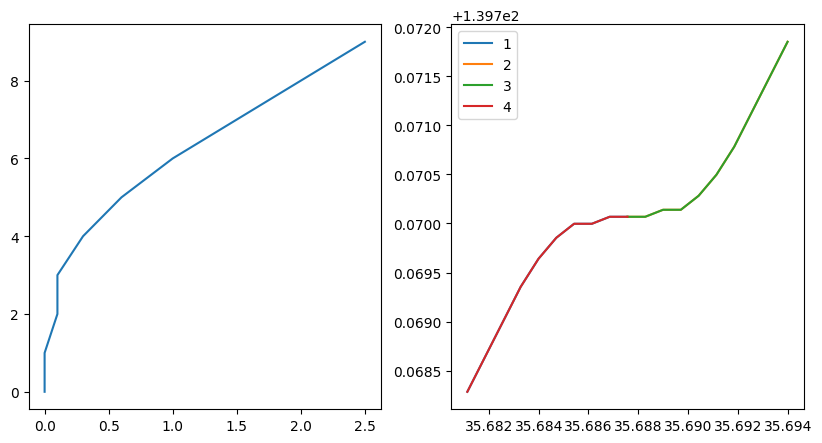

In [21]:
# fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
# ax0.plot(x0, y0)
# ax1.plot(x1, y1, label="1")

rad = latlon_rad - xy_rad
x1 = latlon[0][0] + y0 * np.tan(rad) * ratio
y1 = latlon[0][1] + x0 * np.tan(rad) * ratio
# ax1.plot(x1, y1, label="2")

rad = latlon_rad - xy_rad
x1 = latlon[0][0] + y0 * np.tan(rad) * ratio
y1 = latlon[0][1] + x0 * np.tan(rad) * ratio
# ax1.plot(x1, y1, label="3")

rad = xy_rad - latlon_rad
x1 = latlon[0][0] + y0 * np.tan(rad) * ratio
y1 = latlon[0][1] + x0 * np.tan(rad) * ratio
# ax1.plot(x1, y1, label="4")

# rad = latlon_rad - xy_rad
# x1 = latlon[0][0] + x0 * np.cos(rad) * ratio
# y1 = latlon[0][1] + y0 * np.sin(rad) * ratio
# ax1.plot(x1, y1, label="5")

# ax1.legend()
# plt.show()

In [39]:
rad = xy_rad - latlon_rad
x1 = latlon[0][0] + y0 * np.tan(rad) * ratio
y1 = latlon[0][1] + x0 * np.tan(rad) * ratio

In [13]:
import folium
from folium import plugins
from branca.colormap import LinearColormap

In [14]:
color_scale = LinearColormap(['deepskyblue','lime','tomato'], vmin=10, vmax=30)
color_scale

In [15]:
center = np.mean(latlon, axis=0).tolist()
center

[35.682397847686644, 139.76856241296267]

In [40]:
m = folium.Map(location=center, tiles='cartodbpositron', zoom_start=18, control_scale=True)
fg = folium.FeatureGroup(name='test')
plugins.AntPath(locations=np.array([x1, y1]).T.tolist(), weight=3, color=color_scale(20), opacity=0.8, 
                       reverse=False, dash_array=[20, 30]).add_to(fg)
plugins.AntPath(locations=latlon.tolist(), weight=1, color=color_scale(10), opacity=0.8, 
                       reverse=False, dash_array=[20, 30]).add_to(fg)
fg.add_to(m)

# loc = df.loc[0, 'latlon'].tolist()[0]
# pp = str(df.loc[0, 'linkid'])
# folium.Marker(location=loc, popup=pp).add_to(m)
    
folium.LayerControl(collapsed=False).add_to(m)
m.fit_bounds(latlon.tolist())
m